# Heart case

## Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('heart2.csv')


In [7]:
df.sample(10)

,area,age,frac_short,atrial_dim,wall_motion_index,hemat,per_eff,family,target
49,3,61,0.193,37.483311,1.33,0.498,1,0,0
850,3,59,0.145,42.300000,1.58,0.549,1,1,1
822,4,51,0.120,41.500000,1.64,0.533,0,0,1
622,2,65,0.108,39.500000,1.73,0.494,0,0,1
295,4,61,0.264,37.500000,1.88,0.498,1,1,0
187,2,67,0.176,42.000000,1.20,0.614,0,0,0
316,1,64,0.210,38.700000,1.47,0.530,1,1,0
638,4,67,0.119,40.100000,1.72,0.506,1,1,1
32,1,53,0.244,35.503654,1.72,0.448,1,0,0
699,1,68,0.190,44.600000,1.16,0.593,0,0,1


In [29]:
df.isnull().sum()

area                 0
age                  0
frac_short           0
atrial_dim           0
wall_motion_index    0
hemat                0
per_eff              0
family               0
target               0
dtype: int64

In [30]:
df.tail()

,area,age,frac_short,atrial_dim,wall_motion_index,hemat,per_eff,family,target
911,2,68,0.150,43.0,1.37,0.563,0,0,1
912,1,60,0.159,34.2,1.18,0.393,0,0,1
913,4,67,0.171,39.6,1.98,0.497,0,1,1
914,2,59,0.163,38.9,1.23,0.483,1,0,1
915,2,52,0.171,36.2,1.30,0.430,1,0,1


## Split categorical/continuos variables

In [31]:
df_categorical=df[['area','per_eff','family']]

In [32]:
df_numerical=df[['age', 'frac_short', 'atrial_dim', 'wall_motion_index', 'hemat','target']]
df_numerical.head()

,age,frac_short,atrial_dim,wall_motion_index,hemat,target
0,50,0.235,41.193446,1.65,0.594,0
1,49,0.203,33.906600,1.41,0.406,0
2,51,0.208,34.581016,1.45,0.424,0
3,59,0.248,35.725504,1.76,0.453,0
4,53,0.253,35.716658,1.80,0.453,0


## Categorial Data

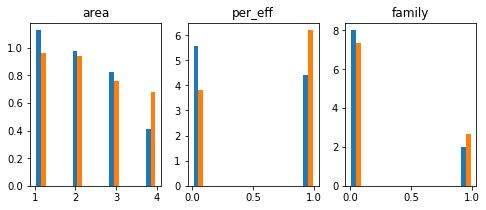

In [33]:
df_0=df_categorical[df['target']==0] # records wih target==1
df_1=df_categorical[df['target']==1] # records wih target==0


fig, axes = plt.subplots(1, 3,figsize=[8,3])
axes = axes.flatten()
i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()


In [34]:
dummies = pd.get_dummies(df_categorical['area'].astype(str)) # ,drop_first=True 

dummies.tail()

,1,2,3,4
911,0,1,0,0
912,1,0,0,0
913,0,0,0,1
914,0,1,0,0
915,0,1,0,0


In [40]:
X_categorical=pd.concat([dummies,df_categorical[['per_eff','family']]],axis=1)

In [42]:
X_categorical.sample(5)

,1,2,3,4,per_eff,family
394,1,0,0,0,1,0
30,1,0,0,0,1,0
530,0,1,0,0,0,0
834,0,1,0,0,1,0
503,0,0,1,0,0,0


## Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c24bc6c50>,
      dtype=object)

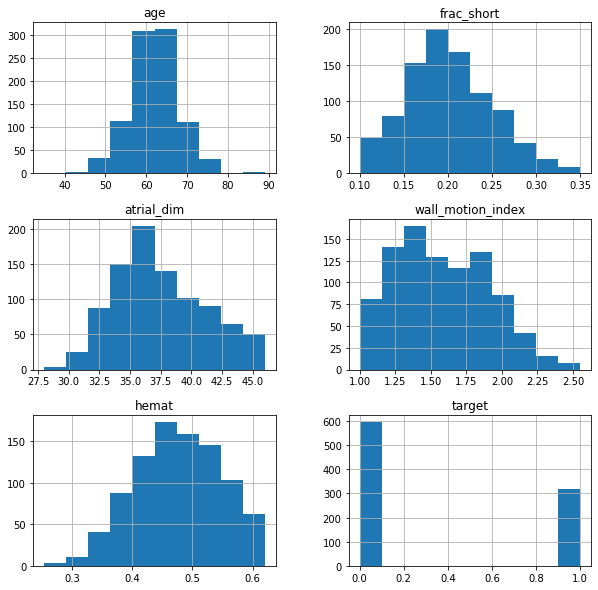

In [43]:
df_numerical.hist(figsize=(10,10))

In [145]:
df_numerical.columns

Index(['age', 'frac_short', 'atrial_dim', 'wall_motion_index', 'hemat',
       'target'],
      dtype='object')

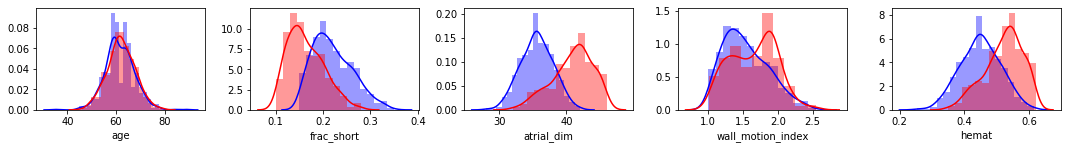

In [156]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

X=df_numerical

X0 = X[X['target']==0]
X1 = X[X['target']==1]

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(15,2))
fig.tight_layout()

for i, ax in zip(range(df_numerical.columns.size), axes.flat):
    sns.distplot(X0.iloc[:,i], color="blue", ax=ax)
    sns.distplot(X1.iloc[:,i], color="red", ax=ax)
plt.show()

## Standarize

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,age,frac_short,atrial_dim,wall_motion_index,hemat,target
0,-2.002002,0.712390,1.020032,0.210831,1.700784,-0.732743
1,-2.172038,0.051602,-0.970195,-0.519881,-0.990638,-0.732743
2,-1.831967,0.154850,-0.785994,-0.398095,-0.732949,-0.732743
3,-0.471682,0.980835,-0.473405,0.545740,-0.317783,-0.732743
4,-1.491896,1.084084,-0.475821,0.667525,-0.317783,-0.732743


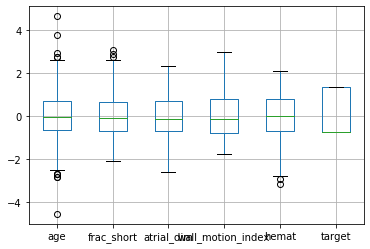

In [46]:
scaled_df.boxplot()

In [47]:
scaled_df.tail()

,age,frac_short,atrial_dim,wall_motion_index,hemat,target
911,1.058639,-1.042829,1.513448,-0.641666,1.256986,1.364734
912,-0.301646,-0.856983,-0.890059,-1.220146,-1.176747,1.364734
913,0.888603,-0.609187,0.584820,1.215559,0.312125,1.364734
914,-0.471682,-0.774384,0.393632,-1.067914,0.111700,1.364734
915,-1.661931,-0.609187,-0.343808,-0.854790,-0.647052,1.364734


In [48]:
#X_numerical=scaled_df
X_numerical=df_numerical

In [49]:
dummies.tail(3)

,1,2,3,4
913,0,0,0,1
914,0,1,0,0
915,0,1,0,0


In [50]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(916, 4)
(916, 6)


,1,2,3,4
911,0,1,0,0
912,1,0,0,0
913,0,0,0,1
914,0,1,0,0
915,0,1,0,0


In [51]:
X=pd.concat([dummies,X_numerical.iloc[:,:-1]], axis = 1)
X.tail()

,1,2,3,4,age,frac_short,atrial_dim,wall_motion_index,hemat
911,0,1,0,0,68,0.150,43.0,1.37,0.563
912,1,0,0,0,60,0.159,34.2,1.18,0.393
913,0,0,0,1,67,0.171,39.6,1.98,0.497
914,0,1,0,0,59,0.163,38.9,1.23,0.483
915,0,1,0,0,52,0.171,36.2,1.30,0.430


### Separate Train/Test sets


In [52]:
y=df['target']

In [53]:
y.shape

(916,)

In [54]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(641, 9) (275, 9)


## Models

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [88]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,30,5)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_gs: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("recall  train %.3f   test %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))



In [89]:
hyperp_search(classifier,parameters)

f1_gs: 0.758936 using {'n_neighbors': 21}
f1      train 0.784   test 0.811
recall  train 0.705   test 0.740

[[171   8]
 [ 25  71]]


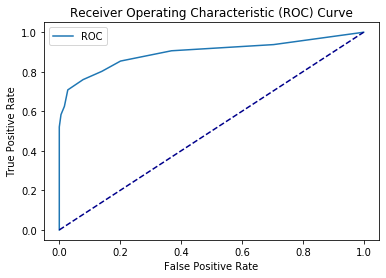

AUC: 0.90


In [90]:
model_knn = KNeighborsClassifier(n_neighbors=10)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

In [91]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

hyperp_search(classifier,parameters)


f1_gs: 0.885021 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}
f1      train 0.967   test 0.952
recall  train 0.973   test 0.927

[[177   2]
 [  7  89]]


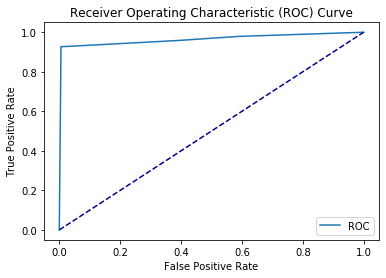

AUC: 0.96


In [191]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


## Plotting the tree 

In [192]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=2)
print(r)


|--- atrial_dim <= 40.50
|   |--- frac_short <= 0.15
|   |   |--- class: 1
|   |--- frac_short >  0.15
|   |   |--- atrial_dim <= 38.05
|   |   |   |--- truncated branch of depth 3
|   |   |--- atrial_dim >  38.05
|   |   |   |--- truncated branch of depth 2
|--- atrial_dim >  40.50
|   |--- hemat <= 0.58
|   |   |--- class: 1
|   |--- hemat >  0.58
|   |   |--- atrial_dim <= 44.05
|   |   |   |--- class: 0
|   |   |--- atrial_dim >  44.05
|   |   |   |--- class: 1



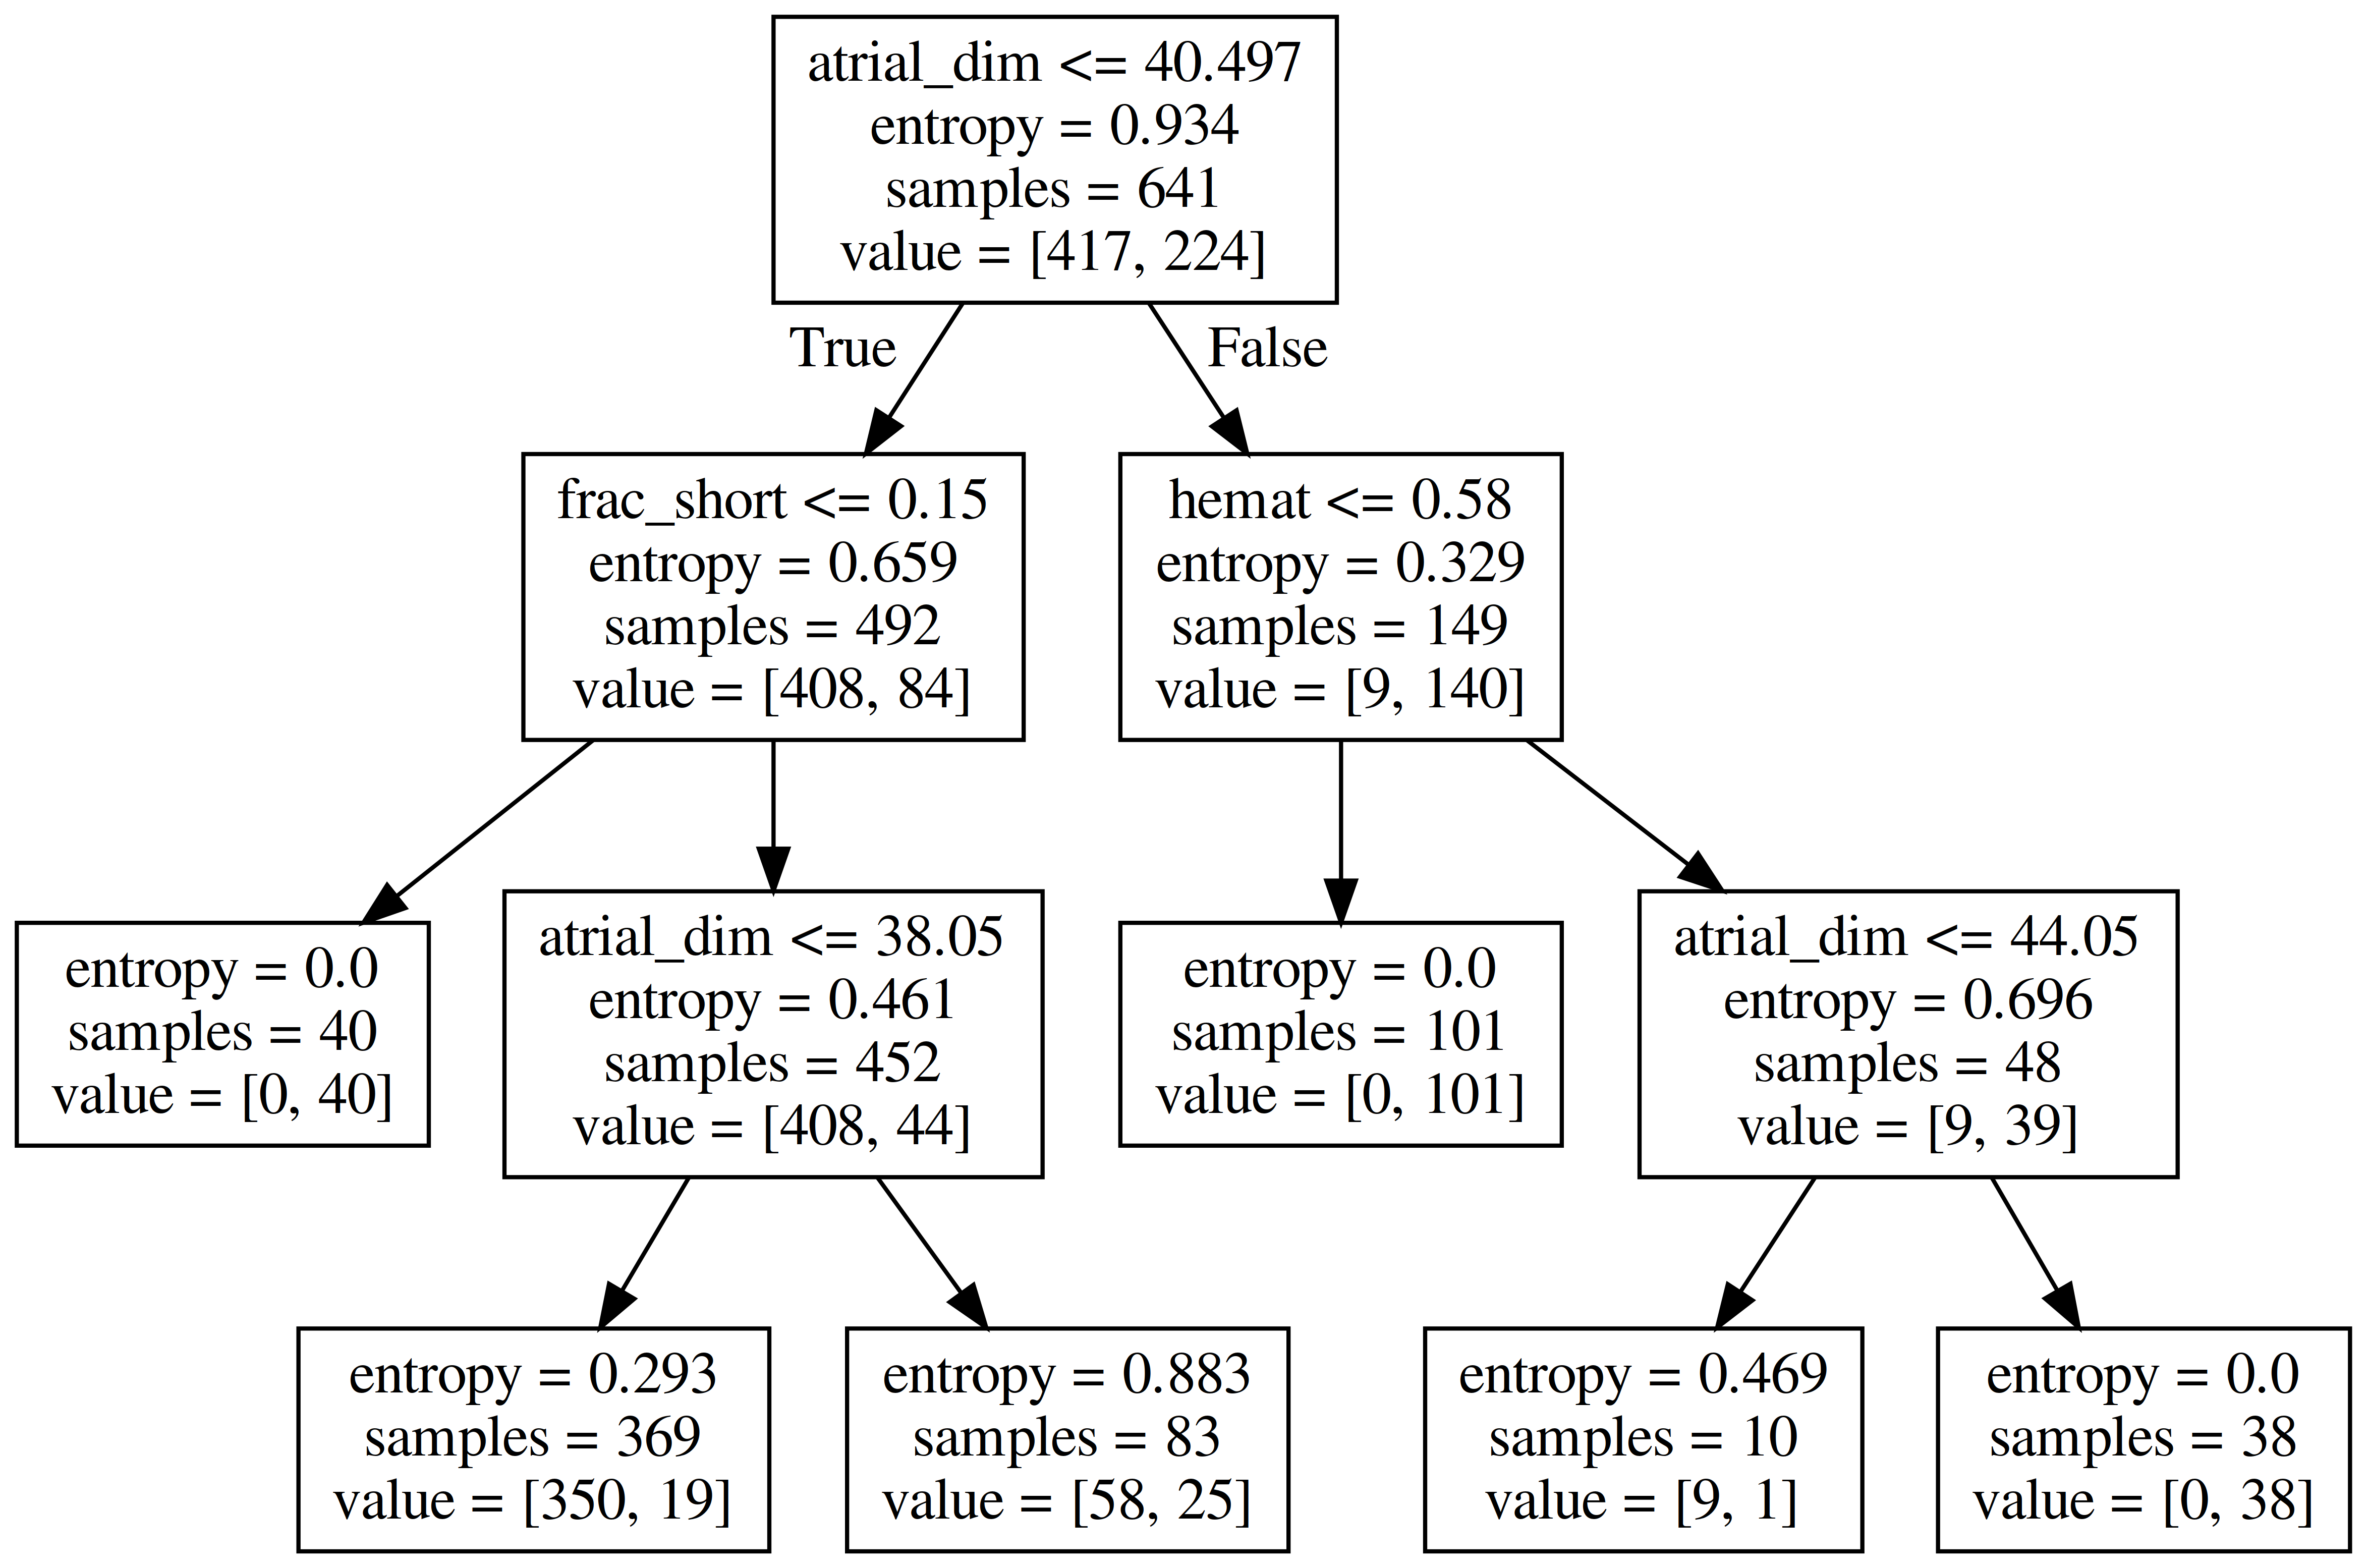

In [206]:
# We can export as a figure but we must install graphviz https://graphviz.gitlab.io/download/

# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} graphviz
#!{sys.executable} -m pip install graphviz

model_tree_truncated = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10, min_samples_split=20)

model_tree_truncated.fit(X_train,y_train) 

from sklearn.tree import export_graphviz
export_graphviz(model_tree_truncated, out_file='decision_tree_heart.dot', feature_names = X_test.columns.tolist())

!dot -Tpng decision_tree_heart.dot -o decision_tree_heart.png -Gdpi=600

from IPython.display import Image
Image(filename = 'decision_tree_heart.png')


In [94]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.8350515463917526
f1_test:  0.8350515463917526
[[162  17]
 [ 15  81]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       179
           1       0.83      0.84      0.84        96

    accuracy                           0.88       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.88      0.88      0.88       275



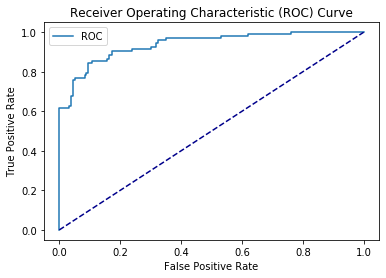

AUC: 0.94


In [95]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)


In [186]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }


hyperp_search(classifier,parameters)

f1_gs: 0.886402 using {'C': 10, 'max_iter': 1000}
f1      train 0.927   test 0.928
recall  train 0.879   test 0.875

[[178   1]
 [ 12  84]]


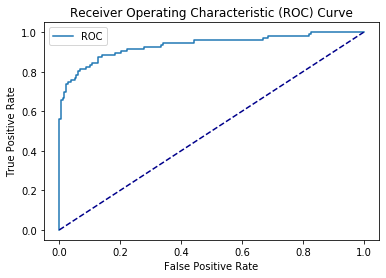

AUC: 0.93


In [187]:
model = LogisticRegression(C=1, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)



In [188]:
model.fit(X_train,y_train)

for i in range(len(X_train.columns)) :
    print('%s : %.4f' % (X_train.columns[i], model.coef_[0,i]))

1 : -0.0891
2 : -0.3498
3 : -0.4439
4 : 0.8577
age : 0.0020
frac_short : -4.1507
atrial_dim : 0.6874
wall_motion_index : 1.0312
hemat : -2.8742


In [160]:
#SVM

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

hyperp_search(classifier,parameters)

f1_gs: 1.000000 using {'C': 100, 'kernel': 'linear'}
f1      train 1.000   test 0.989
recall  train 1.000   test 0.979

[[179   0]
 [  2  94]]


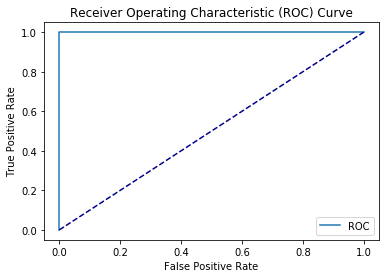

AUC: 1.00


In [99]:
model = SVC(C=100, kernel='linear',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)


In [140]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(20,5,2)],  "max_iter": [15000], "alpha": [10e-04,0.001,0.1,1]}

hyperp_search(classifier,parameters)

f1_gs: 0.648719 using {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'max_iter': 15000}
f1      train 0.842   test 0.842
recall  train 0.759   test 0.750

[[176   3]
 [ 24  72]]


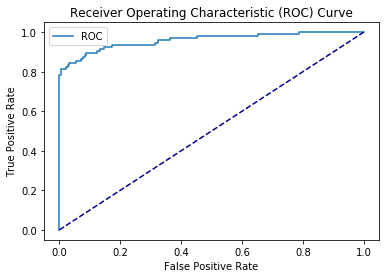

AUC: 0.96


In [141]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.001, max_iter=15000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)


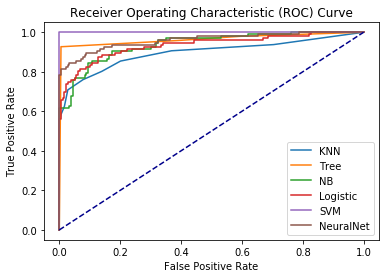

In [142]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")model.coef_

array([[-8.912159
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


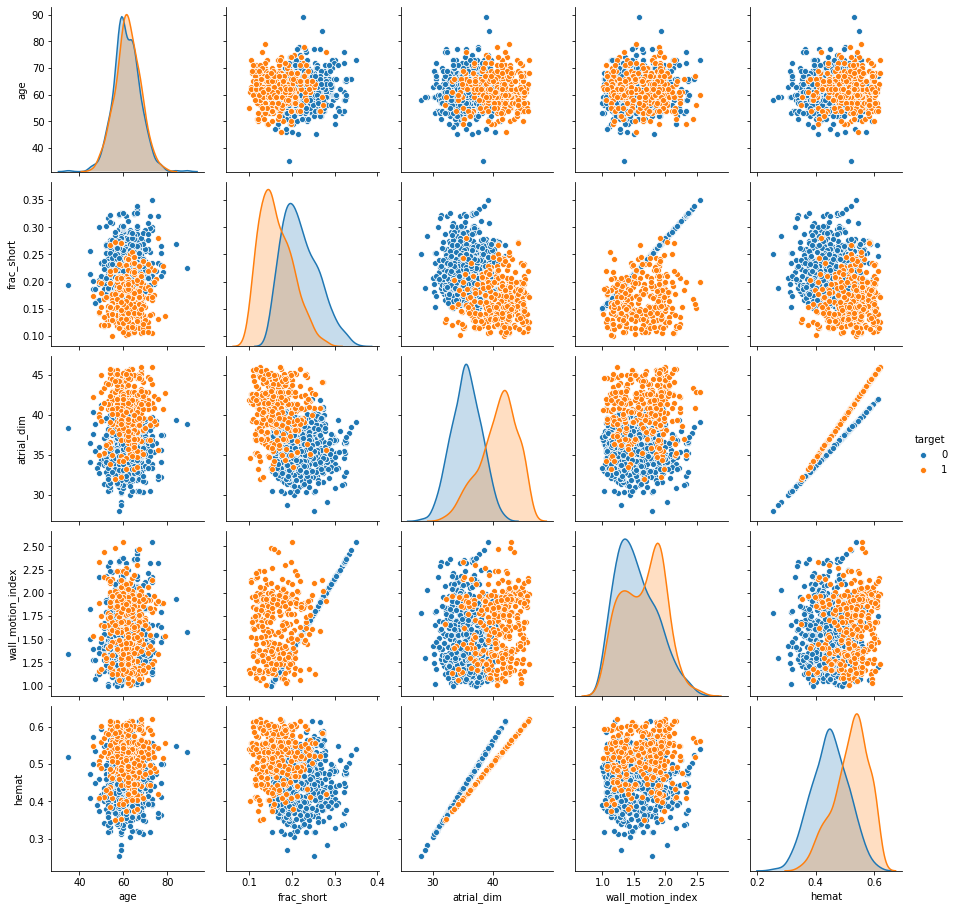

In [157]:
sns.pairplot(df_numerical, hue='target')